# FINGER SIMULATION EXPERIMENT-F1D022120

### Import Libary yang Diperlukan

In [2]:
import cv2 as cv
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import math


## Data Understanding

#### Jumlah Data

Jumlah data yang didapat adalah 2099 an gambar dengan distribusi yang hampir sama di 5 kategori yang berbeda yaitu finger_1, finger_2, finger_3, finger_4, finger_5

#### Jumlah Kelas

Dataset ini terbagi menjadi lima kelas, yang mana masing masing kelas mewakili berapa jumlah jari yang di tampilkan

#### Cara Mendapatkan Data

Cara Mendapatkan Data
Data sidik jari ini disimpan dalam struktur direktori yang berisi subdirektori untuk setiap jari. Setiap subdirektori berisi lebih dari 400 gambar sidik jari yang berkaitan dengan jari tersebut. Proses memuat data dilakukan dengan membaca gambar dari setiap subdirektori, mengubah ukurannya menjadi ukuran yang seragam, dan menyimpan gambar-gambar tersebut beserta label yang sesuai (nama subdirektori).

Caranya adalah membuat fungsi load_images_with_labels yang memuat gambar dari subdirektori yang berbeda. Fungsi ini membaca setiap gambar dalam mode grayscale, mengubah ukurannya menjadi 150x150 piksel, dan menyimpan gambar-gambar tersebut dalam array

In [3]:
def load_images_with_labels(base_folder, target_size=(150, 150)):
    data = []
    labels = []
    fingers = ['finger_1', 'finger_2', 'finger_3', 'finger_4', 'finger_5']
    
    for finger in fingers:
        folder_path = os.path.join(base_folder, finger)
        for filename in os.listdir(folder_path):
            img_path = os.path.join(folder_path, filename)
            img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)
            if img is not None:
                img_resized = cv.resize(img, target_size)
                data.append(img_resized)
                labels.append(finger)
    
    return np.array(data), np.array(labels)

base_folder = 'finger'
data, labels = load_images_with_labels(base_folder, target_size=(150, 150))


2. Eksplorasi Data

Kemudian untuk melakukan eksplorasi data untuk memahami karakteristik dataset. Ini termasuk menghitung jumlah total data dan distribusi per kategori, serta menganalisis karakteristik gambar seperti background, noise, dan pencahayaan.

In [4]:
def data_distribution(labels):
    distribution = pd.Series(labels).value_counts()
    return distribution

distribution = data_distribution(labels)
print('Jumlah total data: ', len(labels))
print('Distribusi data per kategori:\n', distribution)

Jumlah total data:  2099
Distribusi data per kategori:
 finger_1    422
finger_4    420
finger_2    419
finger_3    419
finger_5    419
Name: count, dtype: int64


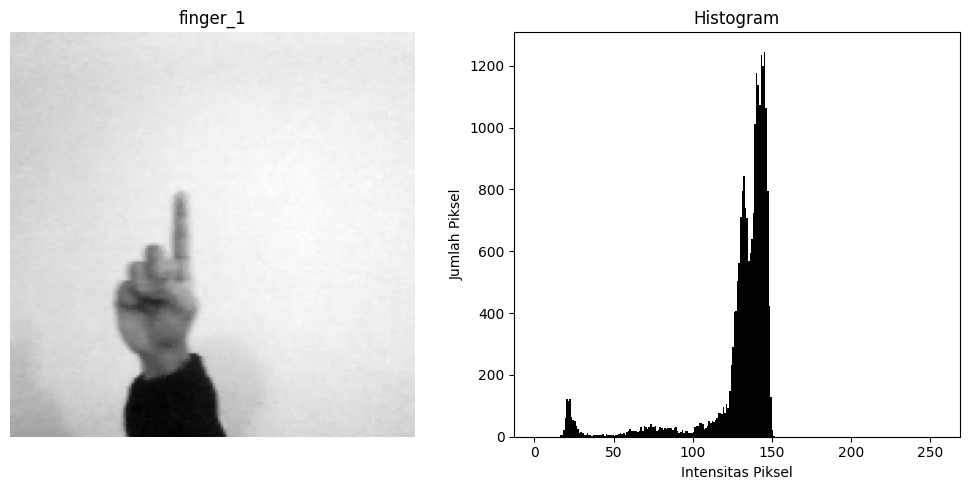

In [5]:
def plot_single_sample_and_histogram(data, label):
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(data, cmap='gray')
    plt.title(label)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.hist(data.ravel(), bins=256, range=[0, 256], color='black')
    plt.title('Histogram')
    plt.xlabel('Intensitas Piksel')
    plt.ylabel('Jumlah Piksel')
    
    plt.tight_layout()
    plt.show()

plot_single_sample_and_histogram(data[0], labels[0])


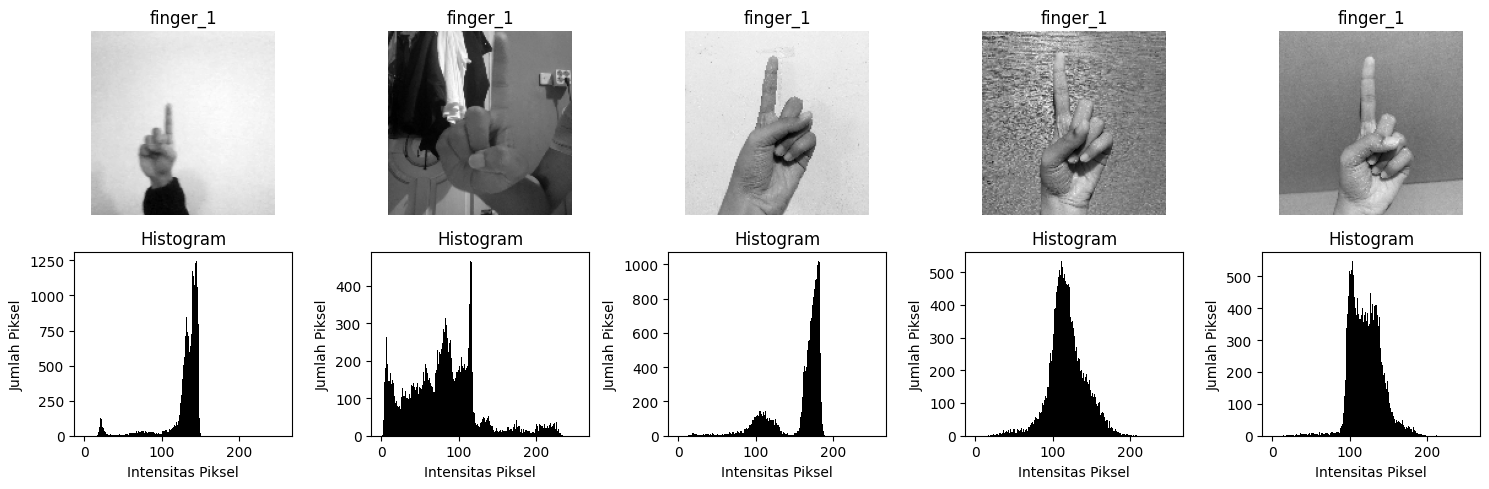

In [6]:
def plot_samples_and_histograms(data, labels, num_samples=5):
    plt.figure(figsize=(15, 5))
    
    for i in range(num_samples):
        plt.subplot(2, num_samples, i + 1)
        plt.imshow(data[i], cmap='gray')
        plt.title(labels[i])
        plt.axis('off')
        
        plt.subplot(2, num_samples, num_samples + i + 1)
        plt.hist(data[i].ravel(), bins=256, range=[0, 256], color='black')
        plt.title('Histogram')
        plt.xlabel('Intensitas Piksel')
        plt.ylabel('Jumlah Piksel')
    
    plt.tight_layout()
    plt.show()

plot_samples_and_histograms(data, labels)


3. Visualisasi Distribusi Data

Kami juga membuat visualisasi distribusi data untuk melihat jumlah data per kategori dan memastikan bahwa dataset terdistribusi secara merata.

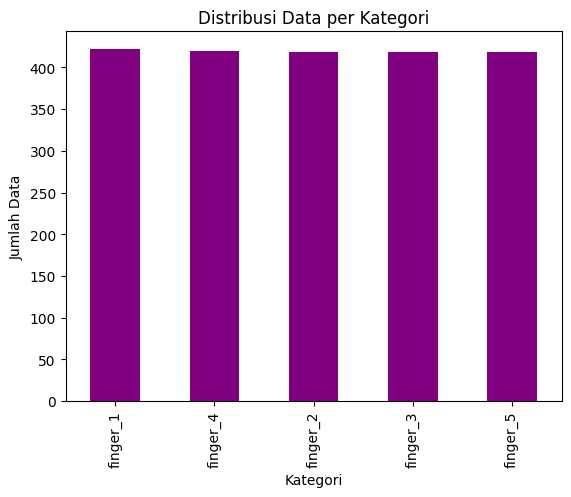

In [7]:
def plot_data_distribution(distribution):
    distribution.plot(kind='bar', color='purple')
    plt.title('Distribusi Data per Kategori')
    plt.xlabel('Kategori')
    plt.ylabel('Jumlah Data')
    plt.show()

plot_data_distribution(distribution)


## Data Preparation

### Image Augmentation

#### Teknik yang Digunakan

Teknik yang akan digunakan adalah rotasi dengan sudut 90, 180, dan 270 derajat. Setiap gambar asli akan menghasilkan tiga gambar baru, sehingga memperkaya dataset dengan variasi yang berbeda dari setiap gambar. Dengan alasan :
1. Variasi Data : di mana Dengan melakukan rotasi, kita dapat menciptakan variasi pada dataset yang dapat membantu model dalam generalisasi dan mengenali pola yang berbeda.
2. Keseragaman Arah : di mana Rotasi gambar dapat membantu dalam mengatasi masalah keseragaman arah pada dataset yang mungkin mempengaruhi performa model.

#### Impelementasi 

In [8]:
def rotate_image(image, angle):
    if angle not in [90, 180, 270]:
        raise ValueError("Angle must be 90, 180, or 270 degrees")
    
    if angle == 90:
        return np.rot90(image, k=1)
    elif angle == 180:
        return np.rot90(image, k=2)
    elif angle == 270:
        return np.rot90(image, k=3)

In [9]:
augmented_data = []
augmented_labels = []

for img, label in zip(data, labels):
    augmented_data.append(img)
    augmented_labels.append(label)

    rotated_90 = rotate_image(img, 90)
    augmented_data.append(rotated_90)
    augmented_labels.append(label)

    rotated_180 = rotate_image(img, 180)
    augmented_data.append(rotated_180)
    augmented_labels.append(label)
    
    rotated_270 = rotate_image(img, 270)
    augmented_data.append(rotated_270)
    augmented_labels.append(label)

In [10]:
augmented_data = np.array(augmented_data)
augmented_labels = np.array(augmented_labels)

In [11]:
def plot_augmented_samples(data, labels, num_samples=5):
    plt.figure(figsize=(15, 10))
    
    for i in range(num_samples):
        plt.subplot(4, num_samples, i + 1)
        plt.imshow(data[i], cmap='gray')
        plt.title(labels[i])
        plt.axis('off')
        
        plt.subplot(4, num_samples, num_samples + i + 1)
        plt.imshow(data[i + num_samples], cmap='gray')
        plt.title(f'{labels[i + num_samples]} - Rotated 90')
        plt.axis('off')
        
        plt.subplot(4, num_samples, 2 * num_samples + i + 1)
        plt.imshow(data[i + 2 * num_samples], cmap='gray')
        plt.title(f'{labels[i + 2 * num_samples]} - Rotated 180')
        plt.axis('off')
        
        plt.subplot(4, num_samples, 3 * num_samples + i + 1)
        plt.imshow(data[i + 3 * num_samples], cmap='gray')
        plt.title(f'{labels[i + 3 * num_samples]} - Rotated 270')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

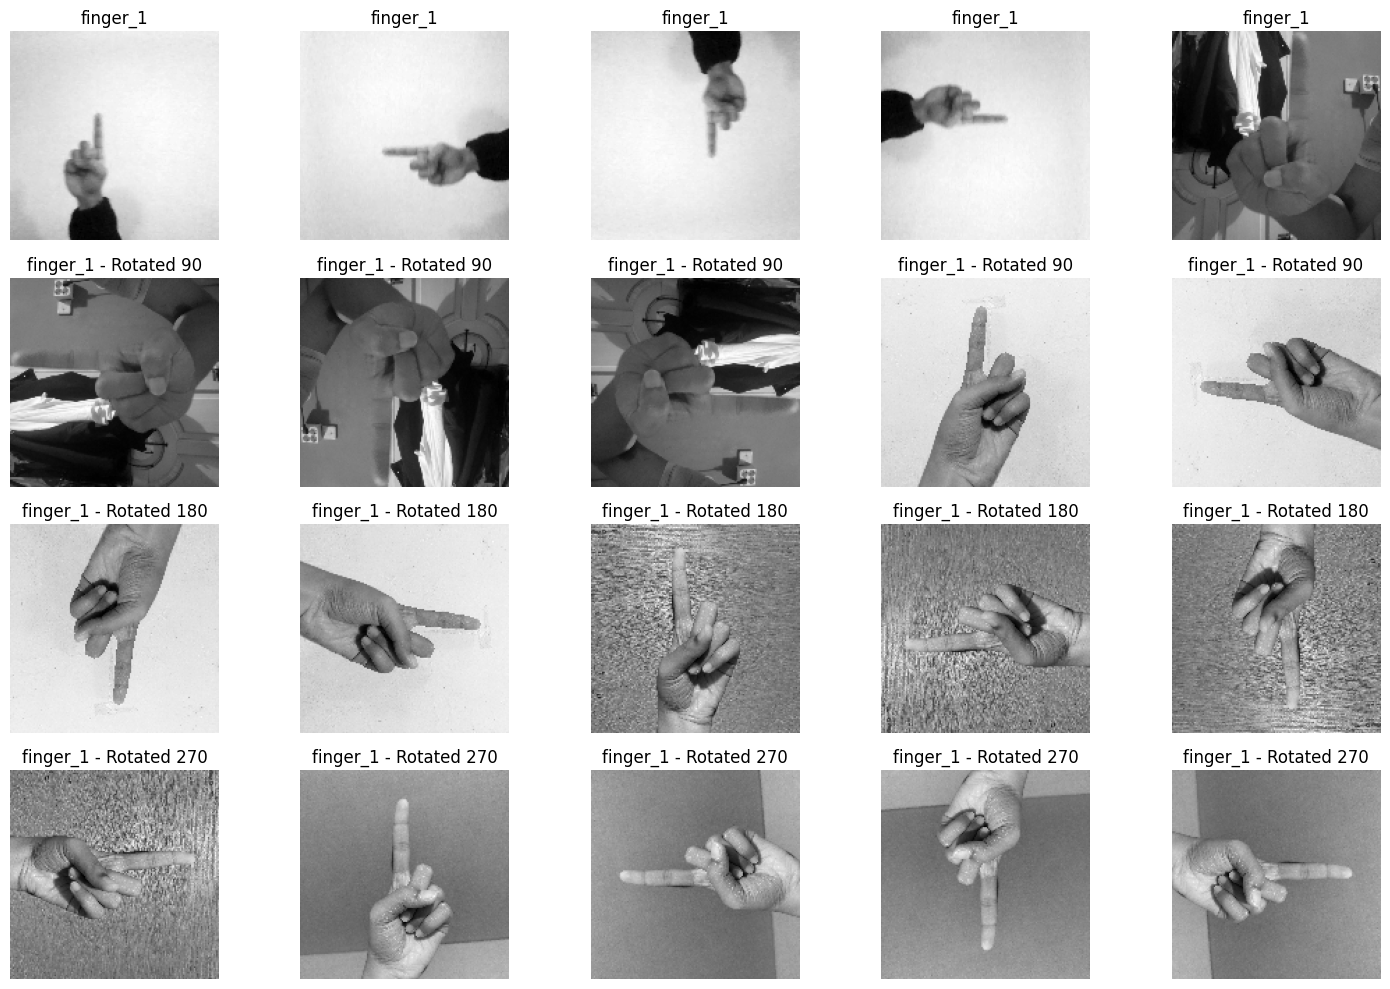

In [12]:
plot_augmented_samples(augmented_data, augmented_labels)

In [13]:
print(f'Total images after augmentation: {len(augmented_labels)}')

Total images after augmentation: 8396


### Preprocessing

Pada percobaan pertama, kita akan menggunakan teknik ekualisasi histogram yang merupakan teknik yang digunakan untuk meningkatkan kontras gambar dengan meratakan distribusi intensitas piksel.

In [14]:
def histogram_equalization(image):
    return cv.equalizeHist(image)

Kemudian gunakan teknik spesifikasi histogram yang merupakan teknik yang mengubah histogram citra menjadi bentuk histogram yang diinginkan.

In [15]:
def histogram_specification(image, reference):
    hist_ref, bins_ref = np.histogram(reference.flatten(), 256, [0, 256])
    cdf_ref = hist_ref.cumsum()
    cdf_ref_normalized = cdf_ref * hist_ref.max() / cdf_ref.max()

    hist, bins = np.histogram(image.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()

    cdf_ref_normalized = np.ma.masked_equal(cdf_ref_normalized, 0)
    cdf_ref_normalized = (cdf_ref_normalized - cdf_ref_normalized.min()) * 255 / (cdf_ref_normalized.max() - cdf_ref_normalized.min())
    cdf_ref_normalized = np.ma.filled(cdf_ref_normalized, 0).astype('uint8')

    cdf_normalized = np.ma.masked_equal(cdf_normalized, 0)
    cdf_normalized = (cdf_normalized - cdf_normalized.min()) * 255 / (cdf_normalized.max() - cdf_normalized.min())
    cdf_normalized = np.ma.filled(cdf_normalized, 0).astype('uint8')

    image_equalized = cdf_ref_normalized[image]
    return image_equalized

Pada percobaan ketiga, kita akan menggunakan teknik median filtering yang merupakan teknik untuk mengurangi noise pada gambar dengan menggantikan setiap piksel dengan nilai median dari piksel-piksel di sekitarnya.

In [16]:
def median_filtering(image, kernel_size=3):
    return cv.medianBlur(image, kernel_size)

#### Menampilkan Hasil Percobaan Preprocessing

In [17]:
sample_images = data[:5]

equalized_images = [histogram_equalization(img) for img in sample_images]

specified_images = [histogram_specification(img, sample_images[0]) for img in sample_images]

filtered_images = [median_filtering(img) for img in sample_images]

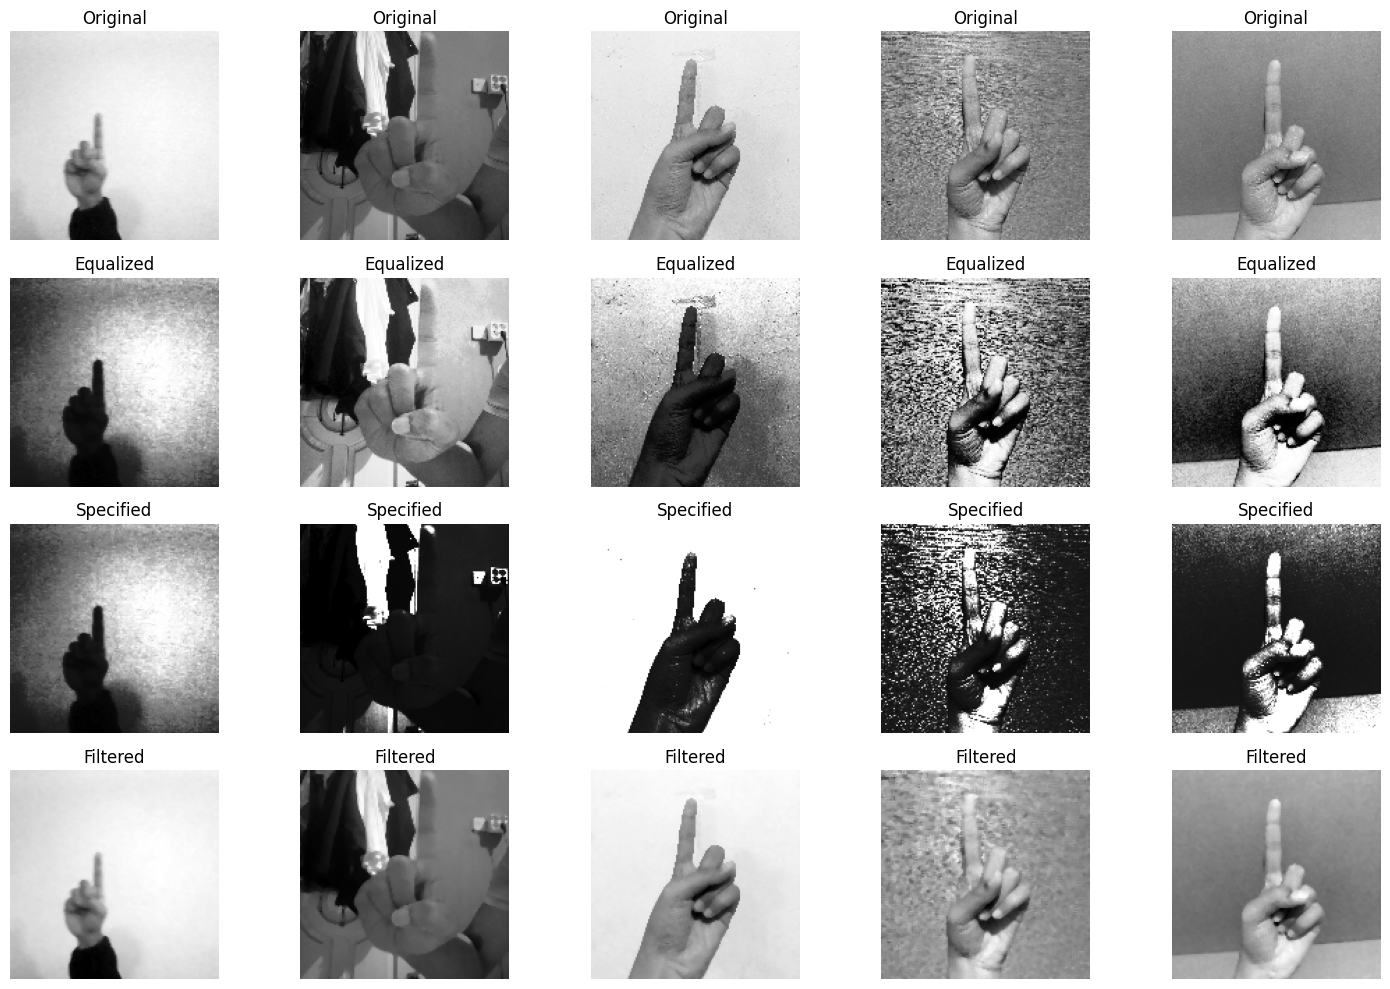

In [18]:
def plot_preprocessed_samples(original, equalized, specified, filtered):
    plt.figure(figsize=(15, 10))
    
    for i in range(len(original)):
        plt.subplot(4, len(original), i + 1)
        plt.imshow(original[i], cmap='gray')
        plt.title('Original')
        plt.axis('off')
        
        plt.subplot(4, len(original), len(original) + i + 1)
        plt.imshow(equalized[i], cmap='gray')
        plt.title('Equalized')
        plt.axis('off')
        
        plt.subplot(4, len(original), 2 * len(original) + i + 1)
        plt.imshow(specified[i], cmap='gray')
        plt.title('Specified')
        plt.axis('off')
        
        plt.subplot(4, len(original), 3 * len(original) + i + 1)
        plt.imshow(filtered[i], cmap='gray')
        plt.title('Filtered')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

plot_preprocessed_samples(sample_images, equalized_images, specified_images, filtered_images)

#### Pemilihan Teknik Terbaik
Untuk menentukan teknik preprocessing yang paling tepat berdasarkan distribusi piksel setelah proses, kita bisa membandingkan histogram intensitas piksel dari hasil preprocessing masing-masing teknik.

1. Histogram hasil Ekualisasi Histogram

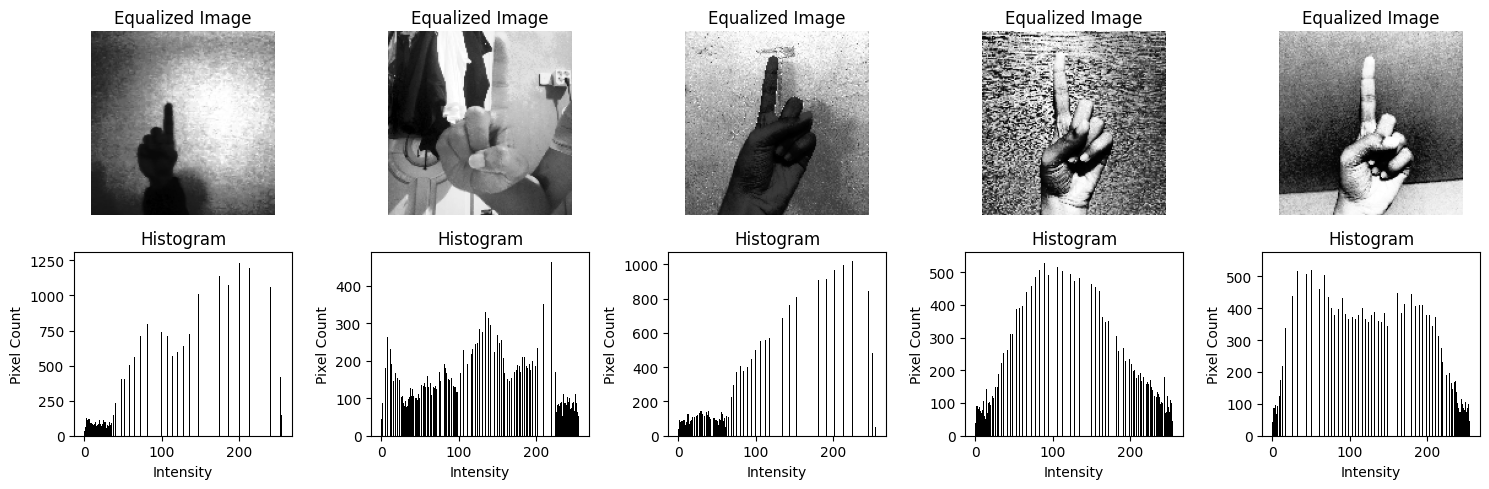

In [19]:
def plot_histogram_equalized(data):
    equalized_data = [histogram_equalization(img) for img in data]
    
    plt.figure(figsize=(15, 5))
    
    for i in range(len(equalized_data)):
        plt.subplot(2, len(equalized_data), i + 1)
        plt.imshow(equalized_data[i], cmap='gray')
        plt.title('Equalized Image')
        plt.axis('off')
        
        plt.subplot(2, len(equalized_data), len(equalized_data) + i + 1)
        plt.hist(equalized_data[i].ravel(), bins=256, range=[0, 256], color='black')
        plt.title('Histogram')
        plt.xlabel('Intensity')
        plt.ylabel('Pixel Count')
    
    plt.tight_layout()
    plt.show()


plot_histogram_equalized(sample_images)


2. Histogram Hasil Spesifikasi Histogram

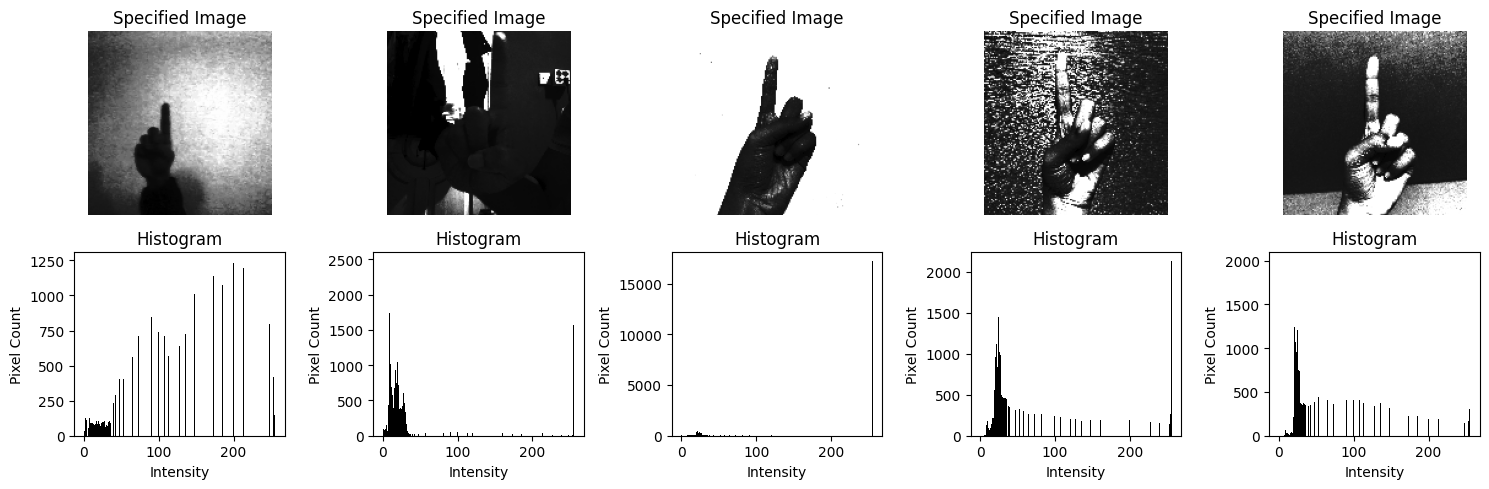

In [20]:
def plot_histogram_specified(data, reference_image):
    specified_data = [histogram_specification(img, reference_image) for img in data]
    
    plt.figure(figsize=(15, 5))
    
    for i in range(len(specified_data)):
        plt.subplot(2, len(specified_data), i + 1)
        plt.imshow(specified_data[i], cmap='gray')
        plt.title('Specified Image')
        plt.axis('off')
        
        plt.subplot(2, len(specified_data), len(specified_data) + i + 1)
        plt.hist(specified_data[i].ravel(), bins=256, range=[0, 256], color='black')
        plt.title('Histogram')
        plt.xlabel('Intensity')
        plt.ylabel('Pixel Count')
    
    plt.tight_layout()
    plt.show()

plot_histogram_specified(sample_images, sample_images[0])


3. Histogram Hasil Median Filtering

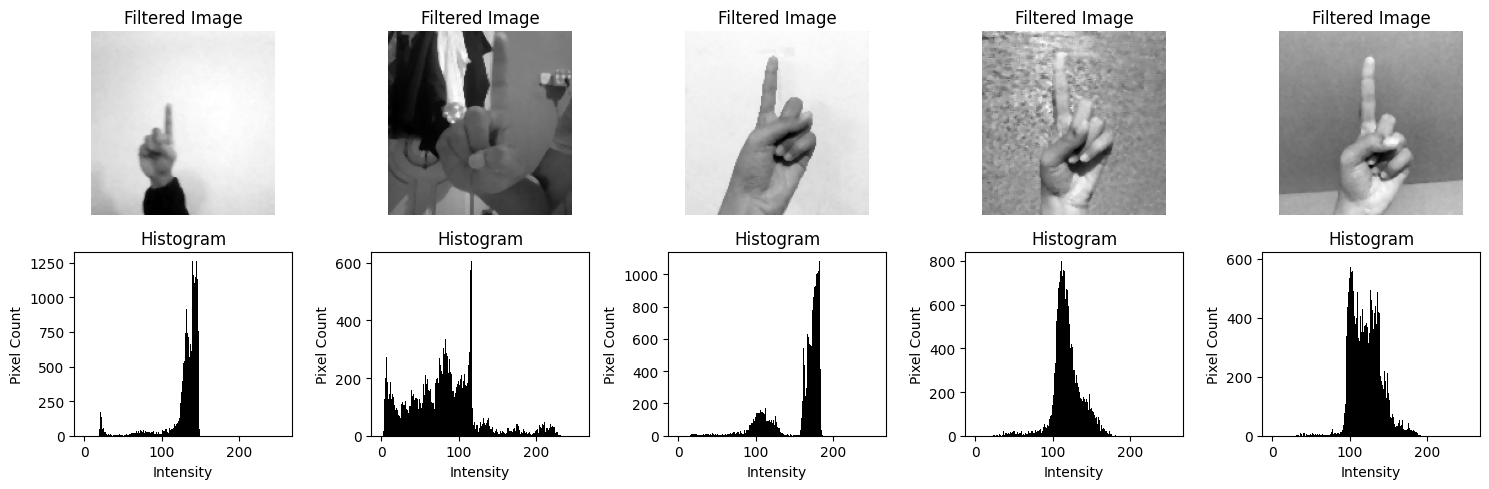

In [21]:
def plot_histogram_filtered(data):
    filtered_data = [median_filtering(img) for img in data]
    
    plt.figure(figsize=(15, 5))
    
    for i in range(len(filtered_data)):
        plt.subplot(2, len(filtered_data), i + 1)
        plt.imshow(filtered_data[i], cmap='gray')
        plt.title('Filtered Image')
        plt.axis('off')
        
        plt.subplot(2, len(filtered_data), len(filtered_data) + i + 1)
        plt.hist(filtered_data[i].ravel(), bins=256, range=[0, 256], color='black')
        plt.title('Histogram')
        plt.xlabel('Intensity')
        plt.ylabel('Pixel Count')
    
    plt.tight_layout()
    plt.show()

plot_histogram_filtered(sample_images)

#### Pemilihan Teknik Terbaik Berdasarkan Histogram
Dari data yang telah di buat dapat di ambil kesimpulan bahwa median filtering merupakan teknik yang terbaik dapat dilihat berdasarkan histrogramnya, Median filtering secara efektif mengurangi noise pada gambar tanpa mengaburkan detail penting, yang sangat penting untuk gambar jari yang mengandung banyak detail halus, Gambar hasil median filtering memiliki kualitas visual yang lebih baik dengan tepi dan detail yang jelas. Ini penting untuk tugas klasifikasi yang mengandalkan fitur visual yang jelas

#### Menerapkan Ke Semua Dataset

In [22]:
filtered_augmented_data = [median_filtering(img) for img in augmented_data]

In [23]:
filtered_augmented_data = np.array(filtered_augmented_data)
augmented_labels = np.array(augmented_labels)


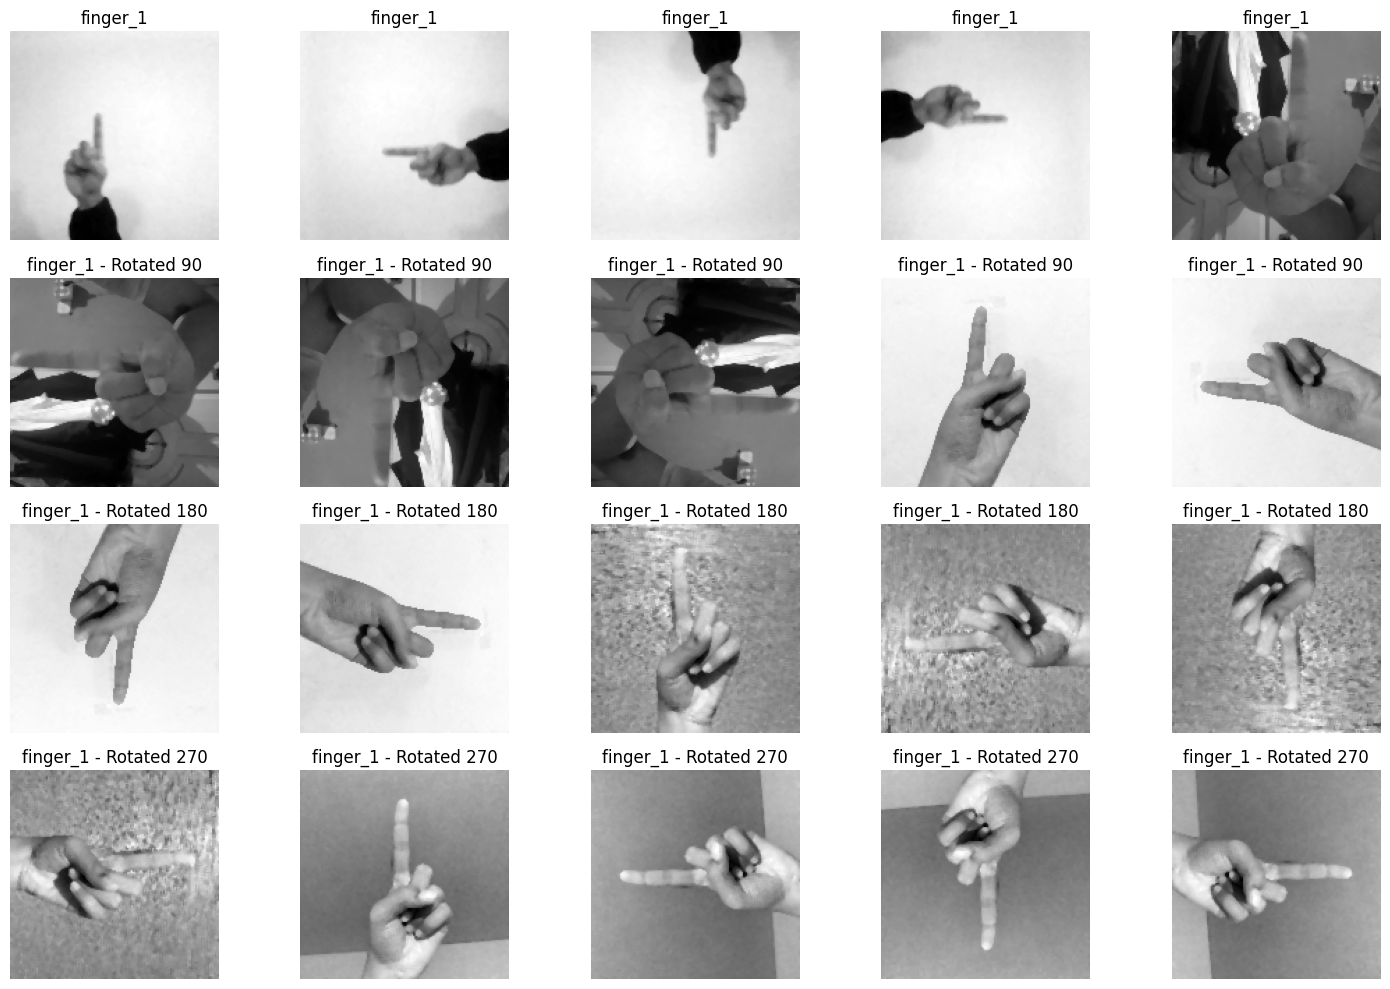

Total images after filtering: 8396


In [24]:
def plot_filtered_samples(data, labels, num_samples=5):
    plt.figure(figsize=(15, 10))
    
    for i in range(num_samples):
        plt.subplot(4, num_samples, i + 1)
        plt.imshow(data[i], cmap='gray')
        plt.title(labels[i])
        plt.axis('off')
        
        plt.subplot(4, num_samples, num_samples + i + 1)
        plt.imshow(data[i + num_samples], cmap='gray')
        plt.title(f'{labels[i + num_samples]} - Rotated 90')
        plt.axis('off')
        
        plt.subplot(4, num_samples, 2 * num_samples + i + 1)
        plt.imshow(data[i + 2 * num_samples], cmap='gray')
        plt.title(f'{labels[i + 2 * num_samples]} - Rotated 180')
        plt.axis('off')
        
        plt.subplot(4, num_samples, 3 * num_samples + i + 1)
        plt.imshow(data[i + 3 * num_samples], cmap='gray')
        plt.title(f'{labels[i + 3 * num_samples]} - Rotated 270')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

plot_filtered_samples(filtered_augmented_data, augmented_labels)
print(f'Total images after filtering: {len(augmented_labels)}')

### Feature Extraction

Pada tahap ini, kita akan melakukan ekstraksi fitur menggunakan metode Gray Level Co-occurrence Matrix (GLCM) pada dataset yang telah difilter dengan median filtering. Fitur-fitur yang akan dihitung meliputi Contrast, Dissimilarity, Homogeneity, Energy, Correlation, Entropy, dan ASM. Penghitungan GLCM akan dilakukan pada sudut 0, 45, 90, dan 135 derajat dengan jarak 1-5.

#### Lakukan Limitasi Dataset Terlebih Dahulu

In [25]:
def limit_augmented_dataset(data, labels, limit=500):
    unique_labels = np.unique(labels)
    samples_per_class = limit // len(unique_labels)
    limited_data = []
    limited_labels = []

    for label in unique_labels:
        indices = np.where(labels == label)[0]
        chosen_indices = np.random.choice(indices, samples_per_class, replace=False)
        limited_data.extend(data[chosen_indices])
        limited_labels.extend(labels[chosen_indices])

    return np.array(limited_data), np.array(limited_labels)

limited_data, limited_labels = limit_augmented_dataset(filtered_augmented_data, augmented_labels, limit=500)

1. Menghitung GLCM
   
Fungsi ini menghitung GLCM untuk citra berdasarkan jarak dan sudut tertentu.

In [26]:
def calculate_glcm(image, distance, angle):
    height, width = image.shape
    glcm = np.zeros((256, 256), dtype=np.float64)
    dx, dy = {
        0: (0, distance),
        45: (-distance, distance),
        90: (-distance, 0),
        135: (-distance, -distance)
    }[angle]

    for i in range(height):
        for j in range(width):
            if 0 <= i + dx < height and 0 <= j + dy < width:
                glcm[image[i, j], image[i + dx, j + dy]] += 1

    glcm /= glcm.sum()
    return glcm

2. Menghitung Fitur

Fungsi ini menghitung fitur-fitur (Contrast, Dissimilarity, Homogeneity, Energy, Correlation, Entropy, ASM) dari GLCM.

In [27]:
def calculate_features(glcm):
    contrast = 0
    dissimilarity = 0
    homogeneity = 0
    energy = 0
    correlation = 0
    entropy = 0
    asm = 0
    mean_i = 0
    mean_j = 0
    std_i = 0
    std_j = 0

    rows, cols = glcm.shape
    for i in range(rows):
        for j in range(cols):
            contrast += ((i - j) ** 2) * glcm[i, j]
            dissimilarity += abs(i - j) * glcm[i, j]
            homogeneity += glcm[i, j] / (1 + abs(i - j))
            energy += glcm[i, j] ** 2
            entropy -= glcm[i, j] * math.log2(glcm[i, j] + 1e-10)  
            mean_i += i * glcm[i, j]
            mean_j += j * glcm[i, j]
            asm += glcm[i, j] ** 2

    for i in range(rows):
        for j in range(cols):
            std_i += ((i - mean_i) ** 2) * glcm[i, j]
            std_j += ((j - mean_j) ** 2) * glcm[i, j]
            correlation += (i * j * glcm[i, j])

    std_i = np.sqrt(std_i)
    std_j = np.sqrt(std_j)
    correlation = (correlation - mean_i * mean_j) / (std_i * std_j + 1e-10)  

    return contrast, dissimilarity, homogeneity, energy, correlation, entropy, asm


3. Ekstraksi Fitur

Fungsi ini melakukan ekstraksi fitur GLCM dari dataset yang telah difilter.

In [28]:
def extract_glcm_features(data, labels):
    distances = [1, 2, 3, 4, 5]
    angles = [0, 45, 90, 135]
    features = []

    for img, label in zip(data, labels):
        img_features = []
        for distance in distances:
            for angle in angles:
                glcm = calculate_glcm(img, distance, angle)
                contrast, dissimilarity, homogeneity, energy, correlation, entropy, asm = calculate_features(glcm)
                img_features.extend([contrast, dissimilarity, homogeneity, energy, correlation, entropy, asm])
        img_features.append(label)
        features.append(img_features)

    columns = []
    for distance in distances:
        for angle in angles:
            columns.extend([
                f'contrast_{angle}_{distance}',
                f'dissimilarity_{angle}_{distance}',
                f'homogeneity_{angle}_{distance}',
                f'energy_{angle}_{distance}',
                f'correlation_{angle}_{distance}',
                f'entropy_{angle}_{distance}',
                f'asm_{angle}_{distance}'
            ])
    columns.append('label')

    df = pd.DataFrame(features, columns=columns)
    return df


In [29]:
glcm_features_df = extract_glcm_features(limited_data, limited_labels)

print(glcm_features_df.head())

glcm_features_df.to_csv('glcm_features.csv', index=False)

   contrast_0_1  dissimilarity_0_1  homogeneity_0_1  energy_0_1  \
0    729.123982          13.988591         0.348274    0.001159   
1     56.564251           1.946443         0.714521    0.015555   
2    139.316018           5.749575         0.437995    0.000722   
3     41.228993           2.486532         0.580942    0.004656   
4     47.734362           4.439687         0.409495    0.001006   

   correlation_0_1  entropy_0_1   asm_0_1  contrast_45_1  dissimilarity_45_1  \
0         0.869367    12.030028  0.001159    1089.369218           18.692672   
1         0.994322     8.491465  0.015555      51.425251            2.325841   
2         0.969489    11.456785  0.000722     222.825413            7.986532   
3         0.955311     9.181102  0.004656      65.849917            3.891807   
4         0.962215    10.883687  0.001006      76.935949            5.922931   

   homogeneity_45_1  ...  entropy_90_5  asm_90_5  contrast_135_5  \
0          0.269561  ...     13.141200  0.000195

### Feature Selection

Pada tahap Feature Selection, kita bertujuan untuk memilih subset fitur yang paling relevan dan informatif dari fitur-fitur yang diekstraksi sebelumnya menggunakan GLCM. Memilih fitur-fitur yang paling penting dapat membantu meningkatkan kinerja model serta mengurangi dimensi data yang tidak relevan, yang dapat mempercepat proses pelatihan dan meminimalkan overfitting.

#### Metode Feature Selection PCA

PCA digunakan untuk mengurangi dimensi dataset dengan memproyeksikan data ke dalam ruang fitur yang lebih rendah, PCA juga menghasilkan komponen utama merupakan kombinasi linear dari fitur fitur asli sehingga dapat mengurangi multikoeritas dalam model klasifikasi

#### Alasan penggunannya adalah

Dataset GLCM yang diekstraksi mungkin memiliki ratusan atau ribuan fitur. Dengan menggunakan semua fitur ini, kita akan menghadapi masalah dalam melatih model, termasuk peningkatan waktu pelatihan dan risiko overfitting.

Dengan menggunakan subset fitur yang paling informatif, kita dapat membangun model yang lebih efisien dan akurat. Fitur-fitur yang dipilih dengan cermat dapat membantu model dalam mempelajari pola yang lebih relevan dalam data.

#### Implementasi

In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)  

pca.fit(glcm_features_df.drop('label', axis=1))

transformed_features = pca.transform(glcm_features_df.drop('label', axis=1))

print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [9.16933529e-01 3.30552547e-02 2.65516827e-02 1.62151384e-02
 5.06263122e-03 9.39779154e-04 4.15677806e-04 3.20583226e-04
 2.46765552e-04 1.19831532e-04]


### Splitting Data

Proses pembagian data menjadi data pelatihan dan data pengujian bertujuan untuk mempersiapkan dataset untuk pelatihan model dan pengujian kinerja model. Data pelatihan digunakan untuk melatih model dan menyesuaikannya dengan pola-pola dalam data, sementara data pengujian digunakan untuk mengevaluasi kinerja model pada data yang belum pernah dilihat sebelumnya.

#### Langkah-langkah:
1. Langkah pertama adalah memisahkan fitur (X) dan label (y) dari dataset. Fitur adalah atribut atau variabel independen yang digunakan untuk melakukan prediksi, sedangkan label adalah variabel dependen yang ingin diprediksi.
2. Menggunakan library scikit-learn, dataset dibagi menjadi data pelatihan dan data pengujian. Pembagian data ini dilakukan dengan proporsi tertentu, seperti 80:20 atau 70:30, di mana 80% atau 70% dari data digunakan untuk pelatihan dan sisanya digunakan untuk pengujian.
3. Setelah pembagian data, terbentuk empat variabel:
   - X_train: Fitur data pelatihan.
   - X_test: Fitur data pengujian.
   - y_train: Label data pelatihan.
   - y_test: Label data pengujian.

#### Implementasi

`test_size`: Menentukan proporsi data yang akan dialokasikan untuk pengujian. Nilai yang umum digunakan adalah 0.2 untuk perbandingan 80:20 atau 0.3 untuk perbandingan 70:30.

`random_state`: Digunakan untuk mengontrol randomization dalam pembagian data, sehingga memastikan hasil yang konsisten dalam setiap eksekusi program.

In [31]:
from sklearn.model_selection import train_test_split

X = glcm_features_df.drop('label', axis=1)
y = glcm_features_df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Jumlah data pelatihan:", len(X_train))
print("Jumlah data pengujian:", len(X_test))


Jumlah data pelatihan: 400
Jumlah data pengujian: 100


### Normalization

Normalisasi data adalah proses penting dalam pra-pemrosesan data untuk pembelajaran mesin. Tujuannya adalah untuk mengubah skala nilai-nilai fitur agar memiliki distribusi yang seragam, sehingga memudahkan proses pembelajaran mesin.

#### Teknik Normalisasi
Dalam proyek ini, digunakan dua teknik normalisasi yang umum digunakan.


1. Standarisasi (Standardization): Mengubah distribusi nilai dari setiap fitur sehingga memiliki mean 0 dan varians 1.


In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


2. Min-Max Normalization: Mengubah nilai-nilai dari setiap fitur ke dalam rentang tertentu, misalnya antara 0 dan 1.

In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)


## Modeling

#### Hyperparameter Tuning untuk Model K-Nearest Neighbors (KNN)

Dalam model KNN, hyperparameter utama yang perlu dioptimalkan adalah jumlah tetangga (n_neighbors) dan metrik jarak yang digunakan (seperti 'euclidean', 'manhattan', atau 'minkowski'). Untuk mengoptimalkan hyperparameter ini, kita perlu menentukan rentang nilai yang akan dieksplorasi, misalnya, n_neighbors dapat dicoba dengan nilai antara 1 hingga sejumlah tetangga maksimum yang mungkin, sementara metrik jarak dapat diuji dengan beberapa metrik umum. Teknik validasi silang digunakan untuk mengevaluasi kinerja model pada setiap kombinasi hyperparameter, dengan membagi dataset menjadi beberapa lipatan dan mengevaluasi model menggunakan berbagai kombinasi data pelatihan dan pengujian. Setelah proses pencarian hyperparameter selesai, model dengan kinerja terbaik diukur menggunakan metrik evaluasi yang ditetapkan, dalam kasus ini, akurasi dapat digunakan sebagai metrik evaluasi.

## Evaluation

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X_train, X_test, y_train, y_test = train_test_split(filtered_augmented_data, augmented_labels, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, 150*150))
X_test_scaled = scaler.transform(X_test.reshape(-1, 150*150))

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Hasil Evaluasi")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Hasil Evaluasi
Accuracy: 0.2048
Precision: 0.2049
Recall: 0.2048
F1-Score: 0.1965
